# Project 2
Sandy Bostian

Continue to explore your dataset using visualization techniques and begin to identify predictive features for the price of a house. What attributes are most relevant in this dataset?

The attributes that seem to be most relevant to predicting price are sqft_living, sqft_living15, bathrooms and view.The variables were chosen based on a correlation matrix. Variables with at least a .24 score were tested. This is based on fitting a linear regression model based on Ordinary Least Squares (OLS). Both the R-squared and Ajusted R-squared for this model are 0.854. The P values for all 4 variables are .000. The bedrooms variable was removed after residual plots showed it to be problematic (dropped well below 0). The intercept was also removed because it returned a non-sensical value ($-67,000). Removing the intercept drastically improved the R-squared.


## References
http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients
http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
https://diamondage.com/2017/06/03/what-does-it-mean-to-fit-a-model-anyway/

In [5]:
# import pandas for data
import pandas as pd
# import numpy for math
import numpy as np
# matplotlib for plotting/viz
from matplotlib import pyplot as plt
# import seaborn for visualization
import seaborn as sns
# import statsmodel for linear regression
import statsmodels.formula.api as smf

# make the visualizations show up in the notebook
%matplotlib inline


In [6]:
# load csv file data with headers
location = "datasets/housesalesprediction/kc_house_data.csv"
df = pd.read_csv(location)

In [7]:
# See what's in the file
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# columns, rows
df.shape

(21613, 21)

In [9]:
# what are the variabels and what types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [10]:
# Are there any nulls in the data
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [11]:
# Describe the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


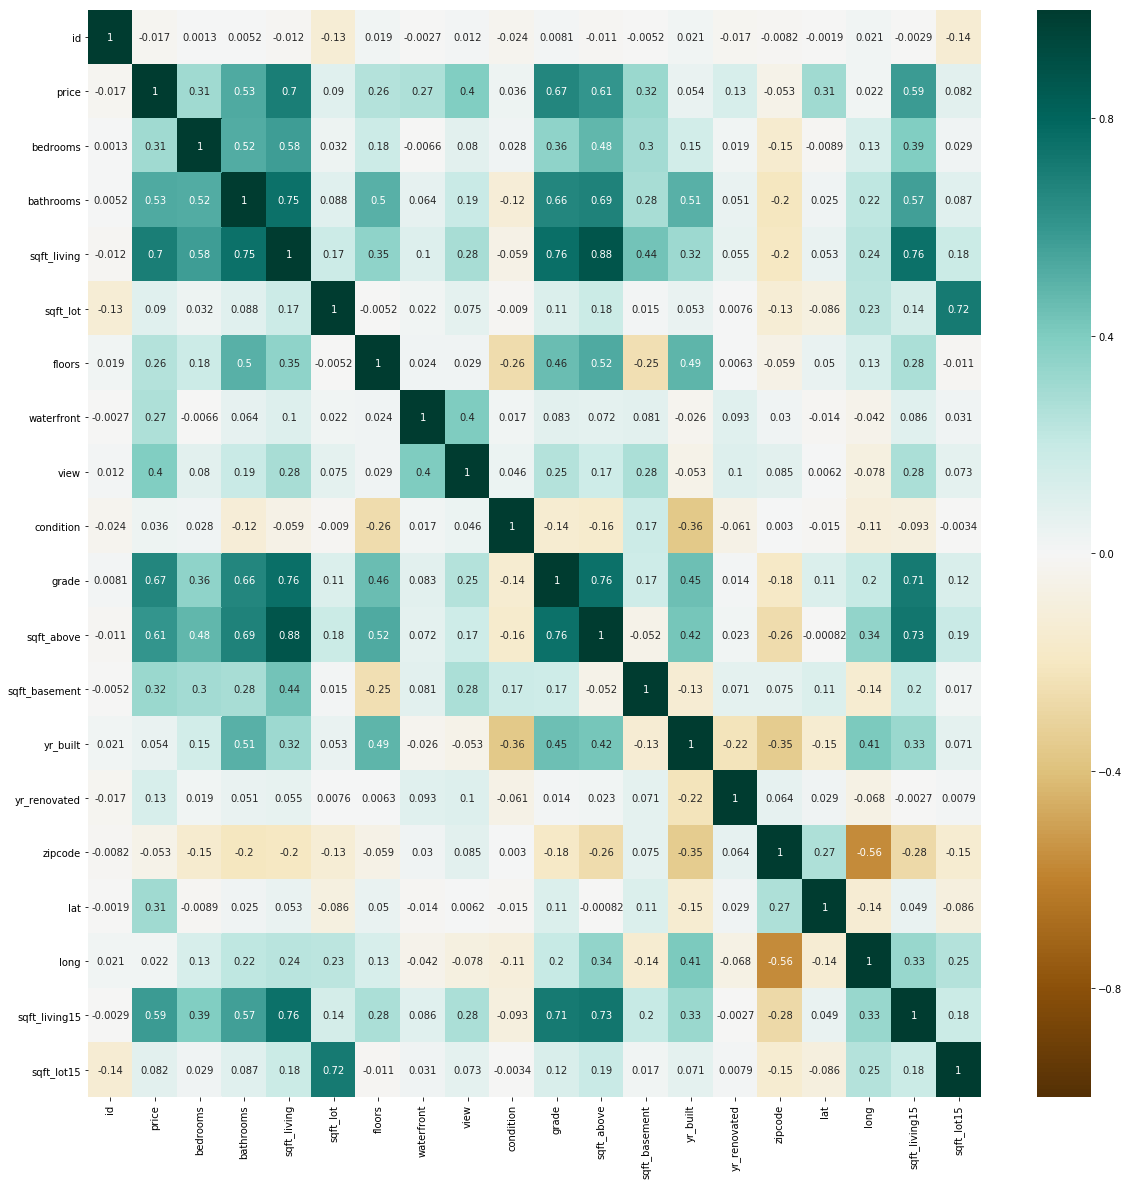

In [13]:
# Correlation Heatmap
correlation = df.corr()
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="BrBG")

In [35]:
# Do the linear regression on the most important variables above
# This is looking at price
# Independent variables are grade, bathrooms, sqft_above, sqft_living15 and sqft_living
lm = smf.ols('price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms ', data=df).fit()

In [34]:
# Generate the regression table
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6392.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        10:36:39   Log-Likelihood:            -2.9917e+05
No. Observations:               21613   AIC:                         5.983e+05
Df Residuals:                   21608   BIC:                         5.984e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.473e+05   1.35e+04    -47.784      0.000   -6.74e+05   -6.21e+05
sqft_living     227.3879      4.185     54.331      0.000     219.184     235.591
grade          1.056e+05   2411.890     43.785      0.000    1.01e+05     1.1e+05
sqft_above      -81.8154      4.464    -18.328      0.000     -90.565     -73.066
sqft_living15    26.2460      4.023      6.524      0.000      18.361      34.131
==============================================================================
Omnibus:                    17344.009   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1141005.581
Skew:                           3.384   Prob(JB):                         0.00
Kurtosis:                      37.946   Cond. No.                     2.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Take out the intercept
lm = smf.ols('price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms - 1 ', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 2.041e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:23:07   Log-Likelihood:            -2.9955e+05
No. Observations:               21613   AIC:                         5.991e+05
Df Residuals:                   21607   BIC:                         5.992e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     319.2941      4.646     68.726      0.000     310.188     328.400
grade          2.823e+04   1260.502     22.393      0.000    2.58e+04    3.07e+04
sqft_above      -55.3152      4.476    -12.359      0.000     -64.088     -46.543
sqft_living15    26.1397      4.108      6.364      0.000      18.088      34.191
bedrooms      -7.637e+04   2084.905    -36.632      0.000   -8.05e+04   -7.23e+04
bathrooms      -1.38e+04   3547.589     -3.890      0.000   -2.08e+04   -6846.614
==============================================================================
Omnibus:                    16221.856   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           757455.899
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      31.307   Cond. No.                     7.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Take out the grade
lm = smf.ols('price ~ sqft_living + sqft_above + sqft_living15 + bathrooms -1 ', data=df).fit()
lm.summary()
# R2 stays the same

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 2.848e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:18:17   Log-Likelihood:            -3.0021e+05
No. Observations:               21613   AIC:                         6.004e+05
Df Residuals:                   21609   BIC:                         6.005e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     281.7412      4.660     60.466      0.000     272.608     290.874
sqft_above      -33.7309      4.571     -7.379      0.000     -42.691     -24.771
sqft_living15    41.5702      3.456     12.029      0.000      34.797      48.344
bathrooms     -2.839e+04   3123.611     -9.088      0.000   -3.45e+04   -2.23e+04
==============================================================================
Omnibus:                    16530.268   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           796917.552
Skew:                           3.240   Prob(JB):                         0.00
Kurtosis:                      32.033   Cond. No.                     6.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Add bedrooms
lm = smf.ols('price ~ sqft_living + sqft_above + sqft_living15 + bathrooms + bedrooms -1 ', data=df).fit()
lm.summary()
# R2 goes up a little

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 2.384e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:24:23   Log-Likelihood:            -2.9980e+05
No. Observations:               21613   AIC:                         5.996e+05
Df Residuals:                   21608   BIC:                         5.996e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     299.2552      4.611     64.894      0.000     290.216     308.294
sqft_above      -44.2997      4.500     -9.845      0.000     -53.119     -35.480
sqft_living15    73.4151      3.564     20.598      0.000      66.429      80.401
bathrooms       1.29e+04   3379.707      3.817      0.000    6274.671    1.95e+04
bedrooms      -5.258e+04   1814.586    -28.978      0.000   -5.61e+04    -4.9e+04
==============================================================================
Omnibus:                    15063.314   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           611764.477
Skew:                           2.857   Prob(JB):                         0.00
Kurtosis:                      28.430   Cond. No.                     7.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Add view
lm = smf.ols('price ~ sqft_living + sqft_above + sqft_living15 + bathrooms + bedrooms + view -1 ', data=df).fit()
lm.summary()
# R2 goes up a little

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 2.158e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:30:47   Log-Likelihood:            -2.9904e+05
No. Observations:               21613   AIC:                         5.981e+05
Df Residuals:                   21607   BIC:                         5.981e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     250.3693      4.618     54.216      0.000     241.318     259.421
sqft_above       -6.9141      4.444     -1.556      0.120     -15.625       1.797
sqft_living15    54.8567      3.472     15.800      0.000      48.051      61.662
bathrooms      1.584e+04   3263.296      4.854      0.000    9443.644    2.22e+04
bedrooms      -3.991e+04   1780.390    -22.415      0.000   -4.34e+04   -3.64e+04
view           9.398e+04   2362.840     39.775      0.000    8.94e+04    9.86e+04
==============================================================================
Omnibus:                    14425.200   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           599531.763
Skew:                           2.664   Prob(JB):                         0.00
Kurtosis:                      28.246   Cond. No.                     7.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# Remove bedrooms because the residual plot is not around 0 
lm = smf.ols('price ~ sqft_living + sqft_above + sqft_living15 + bathrooms + view -1 ', data=df).fit()
lm.summary()
# R2 goes up a little

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 2.521e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:17:35   Log-Likelihood:            -2.9928e+05
No. Observations:               21613   AIC:                         5.986e+05
Df Residuals:                   21608   BIC:                         5.986e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     232.5719      4.602     50.540      0.000     223.552     241.592
sqft_above        4.6211      4.465      1.035      0.301      -4.131      13.373
sqft_living15    29.5909      3.322      8.908      0.000      23.080      36.102
bathrooms     -1.419e+04   3009.848     -4.716      0.000   -2.01e+04   -8294.494
view           1.035e+05   2351.495     43.998      0.000    9.89e+04    1.08e+05
==============================================================================
Omnibus:                    15497.248   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           732025.855
Skew:                           2.932   Prob(JB):                         0.00
Kurtosis:                      30.902   Cond. No.                     6.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# Remove sqft_above because P value is now .3
lm = smf.ols('price ~ sqft_living + sqft_living15 + bathrooms + view -1 ', data=df).fit()
lm.summary()
# R2 stays the same

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 3.151e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:22:17   Log-Likelihood:            -2.9928e+05
No. Observations:               21613   AIC:                         5.986e+05
Df Residuals:                   21609   BIC:                         5.986e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     235.6945      3.474     67.836      0.000     228.884     242.505
sqft_living15    30.4175      3.224      9.434      0.000      24.098      36.738
bathrooms     -1.406e+04   3007.203     -4.677      0.000      -2e+04   -8168.997
view            1.03e+05   2306.257     44.655      0.000    9.85e+04    1.08e+05
==============================================================================
Omnibus:                    15508.587   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           734157.719
Skew:                           2.934   Prob(JB):                         0.00
Kurtosis:                      30.943   Cond. No.                     5.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

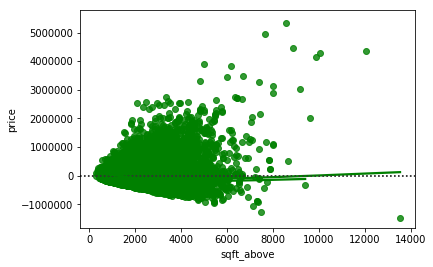

In [57]:
# Plot the residuals after fitting a linear model
sns.residplot(df.sqft_living, df.price, lowess=True, color="g")


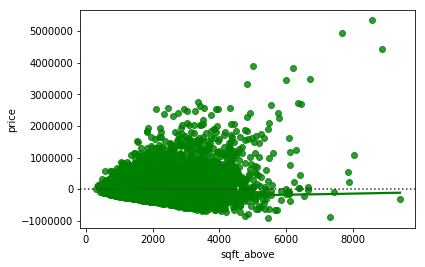

In [58]:
# Plot the residuals after fitting a linear model
sns.residplot(df.sqft_above, df.price, lowess=True, color="g")

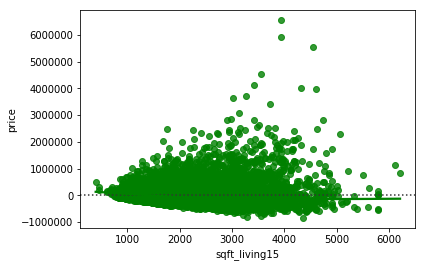

In [59]:
# Plot the residuals after fitting a linear model
sns.residplot(df.sqft_living15, df.price, lowess=True, color="g")

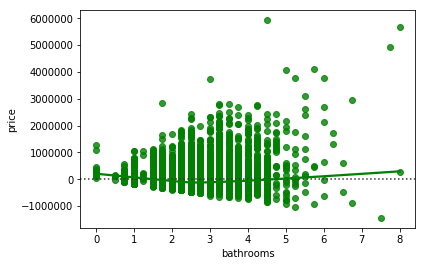

In [60]:
# Plot the residuals after fitting a linear model
sns.residplot(df.bathrooms, df.price, lowess=True, color="g")

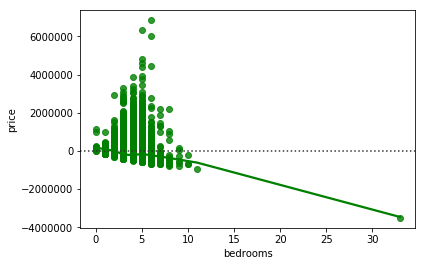

In [61]:
# Plot the residuals after fitting a linear model
sns.residplot(df.bedrooms, df.price, lowess=True, color="g")

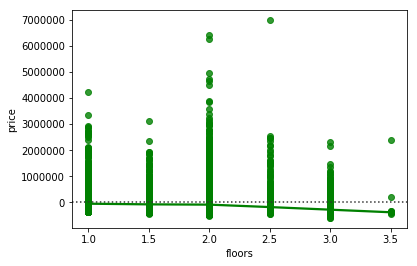

In [65]:
# Plot the residuals after fitting a linear model
sns.residplot(df.floors, df.price, lowess=True, color="g")

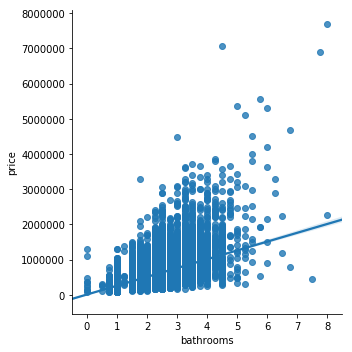

In [49]:
# Plot linear regression
sns.lmplot(x="bathrooms", y="price", data=df)

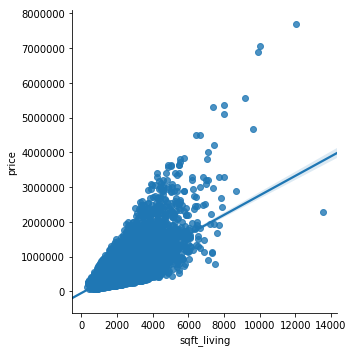

In [27]:
sns.lmplot(x="sqft_living", y="price", data=df)

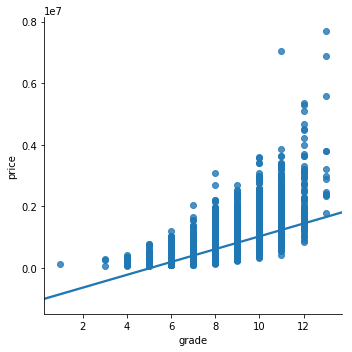

In [28]:
sns.lmplot(x="grade", y="price", data=df)

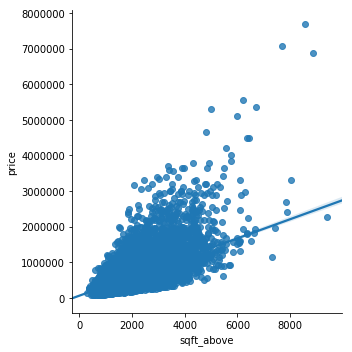

In [29]:
sns.lmplot(x="sqft_above", y="price", data=df)

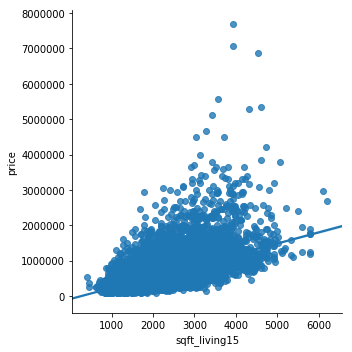

In [30]:
sns.lmplot(x="sqft_living15", y="price", data=df)

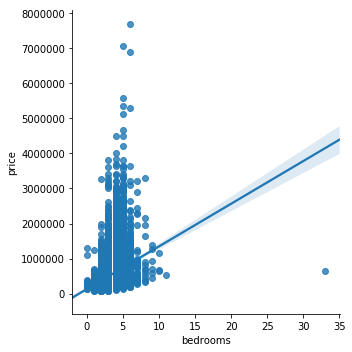

In [63]:
sns.lmplot(x="bedrooms", y="price", data=df)